In [132]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_style("darkgrid")
%matplotlib inline

In [133]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import PolynomialFeatures
from sklearn import metrics
from sklearn.model_selection import cross_val_score
import seaborn as sns
from sklearn import preprocessing
from sklearn import linear_model, svm, gaussian_process
from sklearn.ensemble import RandomForestRegressor
import numpy as np

In [134]:
train=pd.read_csv('Data_ClubMahindra/train.csv')
test=pd.read_csv('Data_ClubMahindra/test.csv')
train.head()

,reservation_id,booking_date,checkin_date,checkout_date,channel_code,main_product_code,numberofadults,numberofchildren,persontravellingid,resort_region_code,...,state_code_residence,state_code_resort,total_pax,member_age_buckets,booking_type_code,memberid,cluster_code,reservationstatusid_code,resort_id,amount_spent_per_room_night_scaled
0,07659f3758d8aee27f5a7e2887adeacb67021cb95ada1b...,05/04/18,05/04/18,06/04/18,3,1,2,0,46,3,...,7.0,3,3,F,1,3d1539e56495b6991f0a3ef5a61ca3d03ce4fff7380e9a...,F,C,4e07408562bedb8b60ce05c1decfe3ad16b72230967de0...,7.706428
1,03930f033646d073462b35d411616323597715ac4fc398...,23/01/15,11/04/15,16/04/15,1,1,2,0,46,3,...,7.0,5,2,F,1,3d1539e56495b6991f0a3ef5a61ca3d03ce4fff7380e9a...,F,A,39fa9ec190eee7b6f4dff1100d6343e10918d044c75eac...,6.662563
2,d145a32920e6587ad95bfe299d80c0affa268220535aaf...,28/01/15,01/02/15,05/02/15,1,1,2,0,47,1,...,7.0,1,2,F,1,3d1539e56495b6991f0a3ef5a61ca3d03ce4fff7380e9a...,E,A,535fa30d7e25dd8a49f1536779734ec8286108d115da50...,7.871602
3,cfd77f44811ed62f25a220b53324cdbafc662a4c9e5f04...,02/05/15,11/06/15,16/06/15,1,1,2,2,46,2,...,7.0,2,2,F,1,3d1539e56495b6991f0a3ef5a61ca3d03ce4fff7380e9a...,D,A,d4735e3a265e16eee03f59718b9b5d03019c07d8b6c51f...,5.344943
4,937cff9e4dcfc2459620153dfc8b9962ac22bea67dfb29...,02/09/15,14/12/15,19/12/15,1,1,2,0,46,2,...,7.0,2,2,F,1,3d1539e56495b6991f0a3ef5a61ca3d03ce4fff7380e9a...,D,A,d4735e3a265e16eee03f59718b9b5d03019c07d8b6c51f...,7.059346


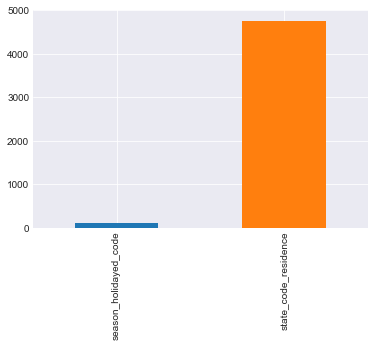

In [48]:
# first we'll visualize null count
null_in_train_csv = train.isnull().sum()
null_in_train_csv = null_in_train_csv[null_in_train_csv > 0]
null_in_train_csv.sort_values(inplace=True)
null_in_train_csv.plot.bar()

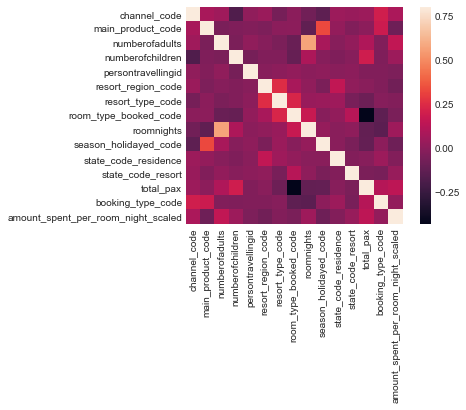

In [49]:
# visualize correlation map
sns.heatmap(train.corr(), vmax=.8, square=True);

In [135]:
arr_train_cor = train.corr()['amount_spent_per_room_night_scaled']
idx_train_cor_gt0 = arr_train_cor[arr_train_cor > 0].sort_values(ascending=False).index.tolist()
print("How many feature candidates have positive correlation with amount(including itself)? %d" % len(idx_train_cor_gt0))

How many feature candidates have positive correlation with amount(including itself)? 8


In [136]:
# we shall list them all, and pick up those we're interested
arr_train_cor[idx_train_cor_gt0]

amount_spent_per_room_night_scaled    1.000000
numberofadults                        0.150047
total_pax                             0.143056
channel_code                          0.088124
roomnights                            0.050379
numberofchildren                      0.047827
state_code_resort                     0.033793
booking_type_code                     0.020525
Name: amount_spent_per_room_night_scaled, dtype: float64

In [137]:
idx_meta = ['amount_spent_per_room_night_scaled','numberofadults', 'total_pax', 'channel_code', 'roomnights', 'numberofchildren', 'state_code_resort', 'booking_type_code']
train_meta = train[idx_meta].copy()
train_meta.head(n=5)

,amount_spent_per_room_night_scaled,numberofadults,total_pax,channel_code,roomnights,numberofchildren,state_code_resort,booking_type_code
0,7.706428,2,3,3,1,0,3,1
1,6.662563,2,2,1,5,0,5,1
2,7.871602,2,2,1,4,0,1,1
3,5.344943,2,2,1,5,2,2,1
4,7.059346,2,2,1,5,0,2,1


In [138]:
# overview
#sns.pairplot(train_meta)

In [139]:
df=train.append(test,ignore_index=True)

df['booking_date']=pd.to_datetime(df['booking_date'])
df['book_y']=df['booking_date'].dt.year
df['book_m']=df['booking_date'].dt.month
df['book_d']=df['booking_date'].dt.day
df['book_w']=df['booking_date'].dt.week

df['checkin_date']=pd.to_datetime(df['checkin_date'])
df['checkin_y']=df['checkin_date'].dt.year
df['checkin_m']=df['checkin_date'].dt.month
df['checkin_d']=df['checkin_date'].dt.day
df['checkin_w']=df['checkin_date'].dt.week
df['checkin_WeekDay']=df['checkin_date'].dt.weekday

df['checkout_date']=pd.to_datetime(df['checkout_date'])
df['checkout_y']=df['checkout_date'].dt.year
df['checkout_m']=df['checkout_date'].dt.month
df['checkout_d']=df['checkout_date'].dt.day
df['checkout_w']=df['checkout_date'].dt.week


C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\frame.py:6201: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=True'.

To retain the current behavior and silence the warning, pass sort=False

  sort=sort)


In [ ]:
df['IsWeekEnd']=df.apply(lambda x: 1 if x['checkin_WeekDay']<5 else 0), axis=1)

In [140]:
idx_meta = ['amount_spent_per_room_night_scaled','numberofadults', 'total_pax', 'channel_code', 'roomnights', 'numberofchildren', 'state_code_resort', 'booking_type_code', 'book_y', 'book_m', 'book_d', 'book_w', 'checkin_y', 'checkin_m', 'checkin_d', 'checkin_w', 'checkout_y', 'checkout_m', 'checkout_d', 'checkout_w','checkin_WeekDay','IsWeekEnd']
df = df[idx_meta]
df.head()

,amount_spent_per_room_night_scaled,numberofadults,total_pax,channel_code,roomnights,numberofchildren,state_code_resort,booking_type_code,book_y,book_m,book_d,book_w,checkin_y,checkin_m,checkin_d,checkin_w,checkout_y,checkout_m,checkout_d,checkout_w
0,7.706428,2,3,3,1,0,3,1,2018,5,4,18,2018,5,4,18,2018,6,4,23
1,6.662563,2,2,1,5,0,5,1,2015,1,23,4,2015,11,4,45,2015,4,16,16
2,7.871602,2,2,1,4,0,1,1,2015,1,28,5,2015,1,2,1,2015,5,2,18
3,5.344943,2,2,1,5,2,2,1,2015,2,5,6,2015,11,6,45,2015,6,16,25
4,7.059346,2,2,1,5,0,2,1,2015,2,9,7,2015,12,14,51,2015,12,19,51


In [141]:
df.columns

Index(['amount_spent_per_room_night_scaled', 'numberofadults', 'total_pax',
       'channel_code', 'roomnights', 'numberofchildren', 'state_code_resort',
       'booking_type_code', 'book_y', 'book_m', 'book_d', 'book_w',
       'checkin_y', 'checkin_m', 'checkin_d', 'checkin_w', 'checkout_y',
       'checkout_m', 'checkout_d', 'checkout_w'],
      dtype='object')

In [142]:
df['family_Size']=df.apply(lambda x: int(x['numberofadults'])+int(x['numberofchildren']), axis=1)
df.head()

,amount_spent_per_room_night_scaled,numberofadults,total_pax,channel_code,roomnights,numberofchildren,state_code_resort,booking_type_code,book_y,book_m,...,book_w,checkin_y,checkin_m,checkin_d,checkin_w,checkout_y,checkout_m,checkout_d,checkout_w,family_Size
0,7.706428,2,3,3,1,0,3,1,2018,5,...,18,2018,5,4,18,2018,6,4,23,2
1,6.662563,2,2,1,5,0,5,1,2015,1,...,4,2015,11,4,45,2015,4,16,16,2
2,7.871602,2,2,1,4,0,1,1,2015,1,...,5,2015,1,2,1,2015,5,2,18,2
3,5.344943,2,2,1,5,2,2,1,2015,2,...,6,2015,11,6,45,2015,6,16,25,4
4,7.059346,2,2,1,5,0,2,1,2015,2,...,7,2015,12,14,51,2015,12,19,51,2


In [13]:
#df['state_code_residence'] = df.state_code_residence.fillna(df.state_code_residence.mode())

AttributeError: 'DataFrame' object has no attribute 'state_code_residence'

In [143]:
dftrain=df[df['amount_spent_per_room_night_scaled'].isnull()!=True]
dftest=df[df['amount_spent_per_room_night_scaled'].isnull()==True]
dftrain.head()

,amount_spent_per_room_night_scaled,numberofadults,total_pax,channel_code,roomnights,numberofchildren,state_code_resort,booking_type_code,book_y,book_m,...,book_w,checkin_y,checkin_m,checkin_d,checkin_w,checkout_y,checkout_m,checkout_d,checkout_w,family_Size
0,7.706428,2,3,3,1,0,3,1,2018,5,...,18,2018,5,4,18,2018,6,4,23,2
1,6.662563,2,2,1,5,0,5,1,2015,1,...,4,2015,11,4,45,2015,4,16,16,2
2,7.871602,2,2,1,4,0,1,1,2015,1,...,5,2015,1,2,1,2015,5,2,18,2
3,5.344943,2,2,1,5,2,2,1,2015,2,...,6,2015,11,6,45,2015,6,16,25,4
4,7.059346,2,2,1,5,0,2,1,2015,2,...,7,2015,12,14,51,2015,12,19,51,2


In [144]:
X,y=dftrain.drop('amount_spent_per_room_night_scaled',axis=1),dftrain['amount_spent_per_room_night_scaled']



In [121]:
#from sklearn.preprocessing import StandardScaler
#sc = StandardScaler()
#X = sc.fit_transform(X)

In [145]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,f1_score
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state = 1994)

In [146]:
linearreg = LinearRegression() #applying the linear regression model
linearreg.fit(X_train, y_train) #fitting the model to the training data
y_predict = linearreg.predict(X_test) #making predictions based on the testing unit
print(np.sqrt(metrics.mean_squared_error(y_test, y_predict))) #calculating the RMSE number

1.0592053760204023


In [ ]:
from sklearn.metrics import make_scorer, accuracy_score
from sklearn.model_selection import GridSearchCV

# Choose the type of classifier. 
from sklearn.ensemble import RandomForestRegressor

tuned_parameters = [{'max_depth': range(20,60),
                             'n_estimators': range(10,40),
                             'max_features': ['sqrt', 'log2', None]
                             }
                            ]
clf = GridSearchCV(RandomForestRegressor(n_estimators=30), tuned_parameters, cv=5, scoring='neg_mean_squared_error')
clf.fit(X_train, y_train.ravel())
print("Best parameters set found on development set:\n")
print(clf.best_params_)
print("Grid scores on development set:\n")
for params, mean_score, scores in clf.grid_scores_:
    print("%0.3f (+/-%0.03f) for %r\n" % (mean_score, scores.std() * 2, params))
print("MSE for test data set:\n")
y_true, y_pred = y_test, clf.predict(X_test)
print(np.sqrt(mean_squared_error(y_true, y_pred)))
#regressor = RandomForestRegressor(random_state=0)  
#regressor.fit(X_train, y_train)  
#y_pred = regressor.predict(X_test) 

In [125]:
#print(accuracy_score(y_test, y_pred))
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))  

Mean Absolute Error: 0.8148557890397966
Mean Squared Error: 1.1986723206822347
Root Mean Squared Error: 1.0948389473718199


In [82]:

dftest.drop(['amount_spent_per_room_night_scaled'],axis=1,inplace=True)


C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\frame.py:3694: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [83]:
final=linearreg.predict(dftest)

In [84]:
dftest['amount_spent_per_room_night_scaled']=final

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [85]:
dftest.head()

,numberofadults,total_pax,channel_code,roomnights,numberofchildren,state_code_resort,booking_type_code,family_Size,amount_spent_per_room_night_scaled
341424,2,3,3,1,0,3,1,2,7.668076
341425,4,2,1,8,0,4,1,4,7.504624
341426,3,3,3,3,0,2,1,3,7.732590
341427,3,3,1,3,0,6,1,3,7.583420
341428,4,2,1,8,0,11,1,4,7.585801


In [86]:
rr=pd.read_csv('Data_ClubMahindra/test.csv')
dftest['reservation_id']=rr['reservation_id']
dftest[['reservation_id','amount_spent_per_room_night_scaled']].to_csv('C:/Machine Learning/ClubMahindra/2.csv')

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [88]:
rr=pd.read_csv('Data_ClubMahindra/test.csv')
dd=pd.concat([rr['reservation_id'],dftest['amount_spent_per_room_night_scaled']],axis=1)
dd.to_csv('C:/Machine Learning/ClubMahindra/3.csv')